scikit-learn version: 0.22.2.post1
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rat

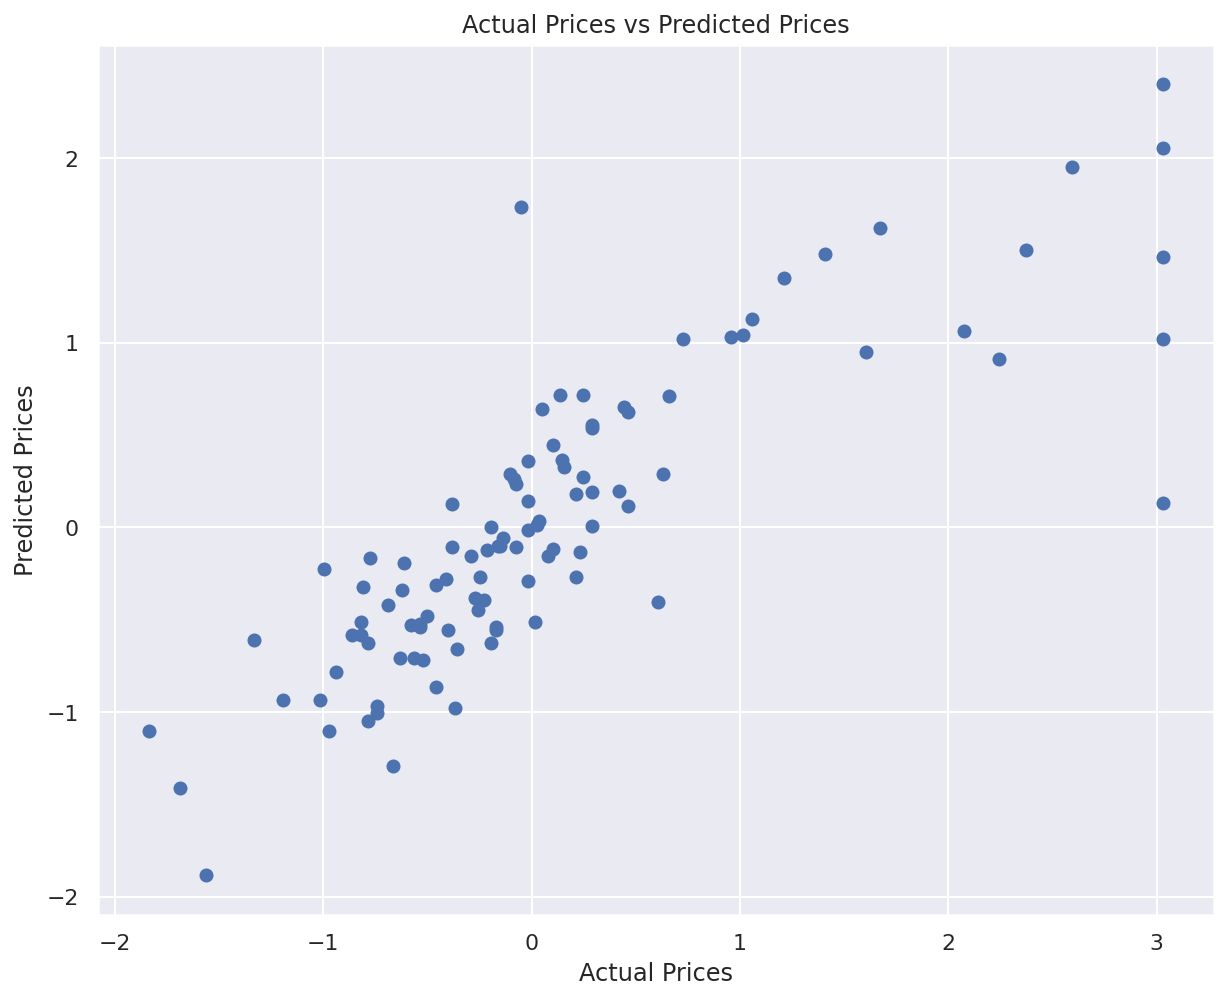

666 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Training MSE: 0.25. Test MSE: 0.33


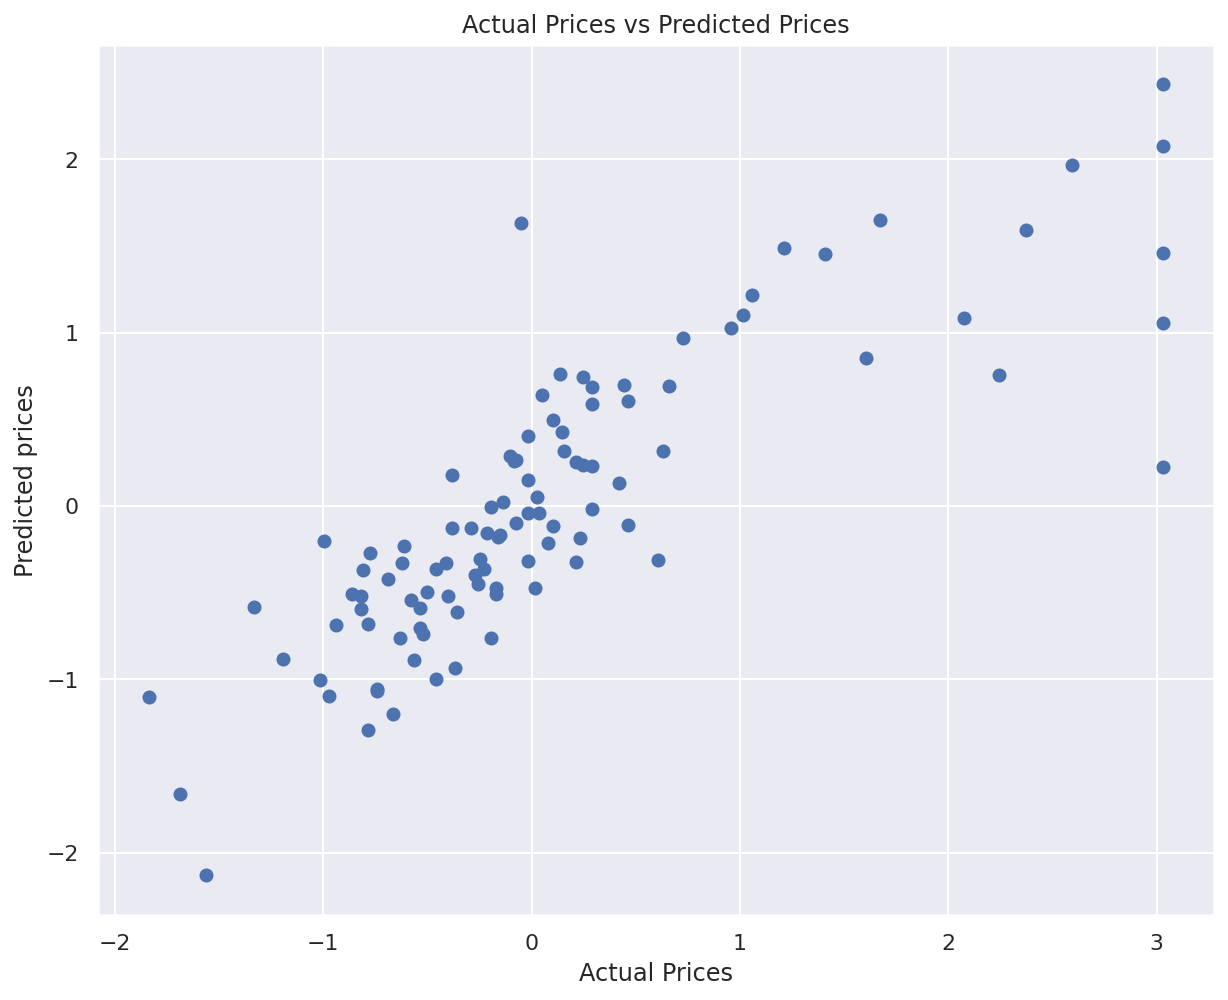

Autosave disabled


In [2]:
%run '03-boston_housing.ipynb'
%autosave 0

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor()
param_grid = {
    'max_depth': [5, 10, 20, 50]
}
grid_search_cv = GridSearchCV(estimator, param_grid, verbose=1, cv=10)

In [55]:
grid_search_cv.fit(x_train, y_train.flat)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [56]:
grid_search_cv.best_params_

{'max_depth': 50}

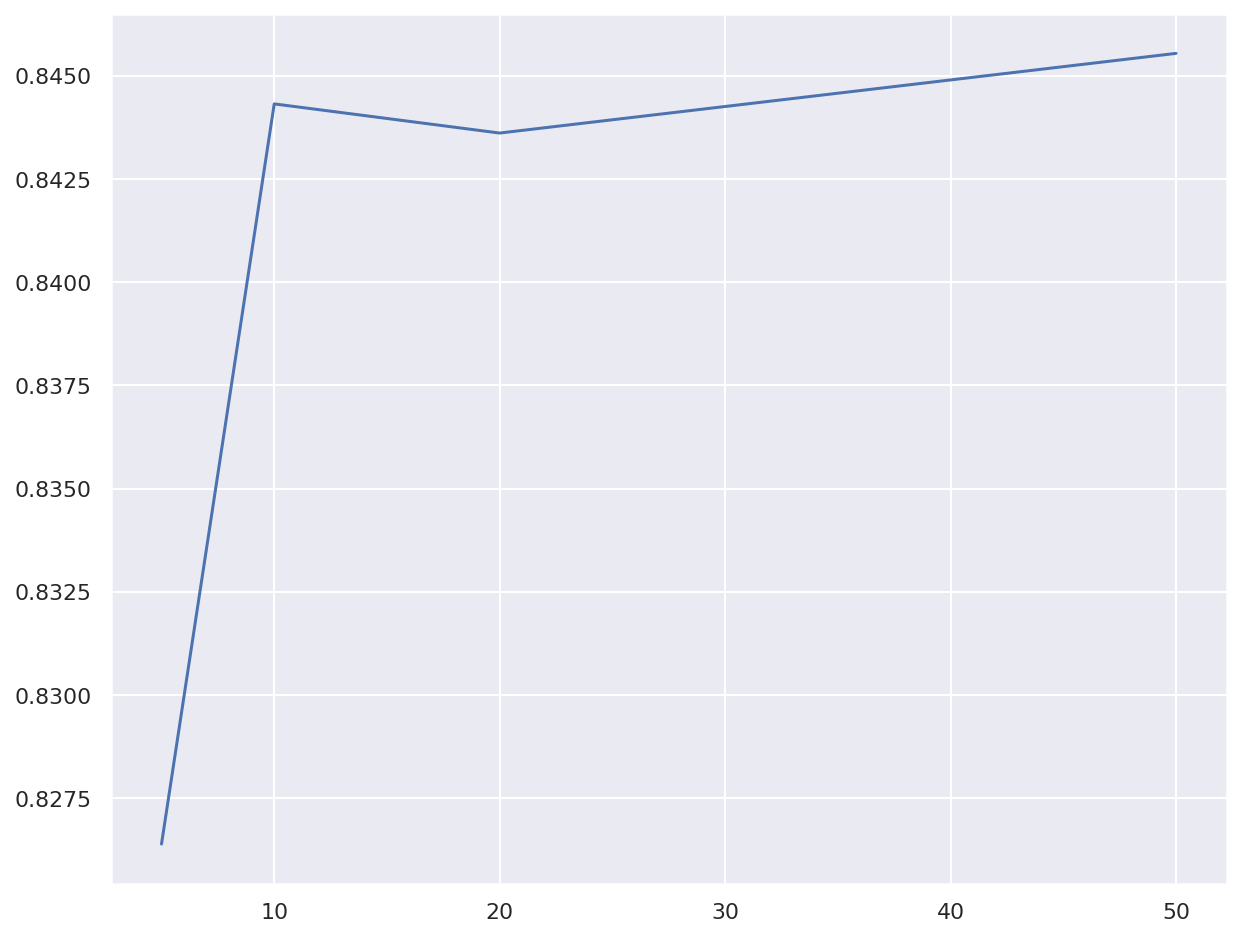

In [57]:
plt.plot(param_grid['max_depth'], grid_search_cv.cv_results_['mean_test_score']);

In [61]:
from sklearn.metrics import r2_score

Training MSE: 0.02. Test MSE: 0.24


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

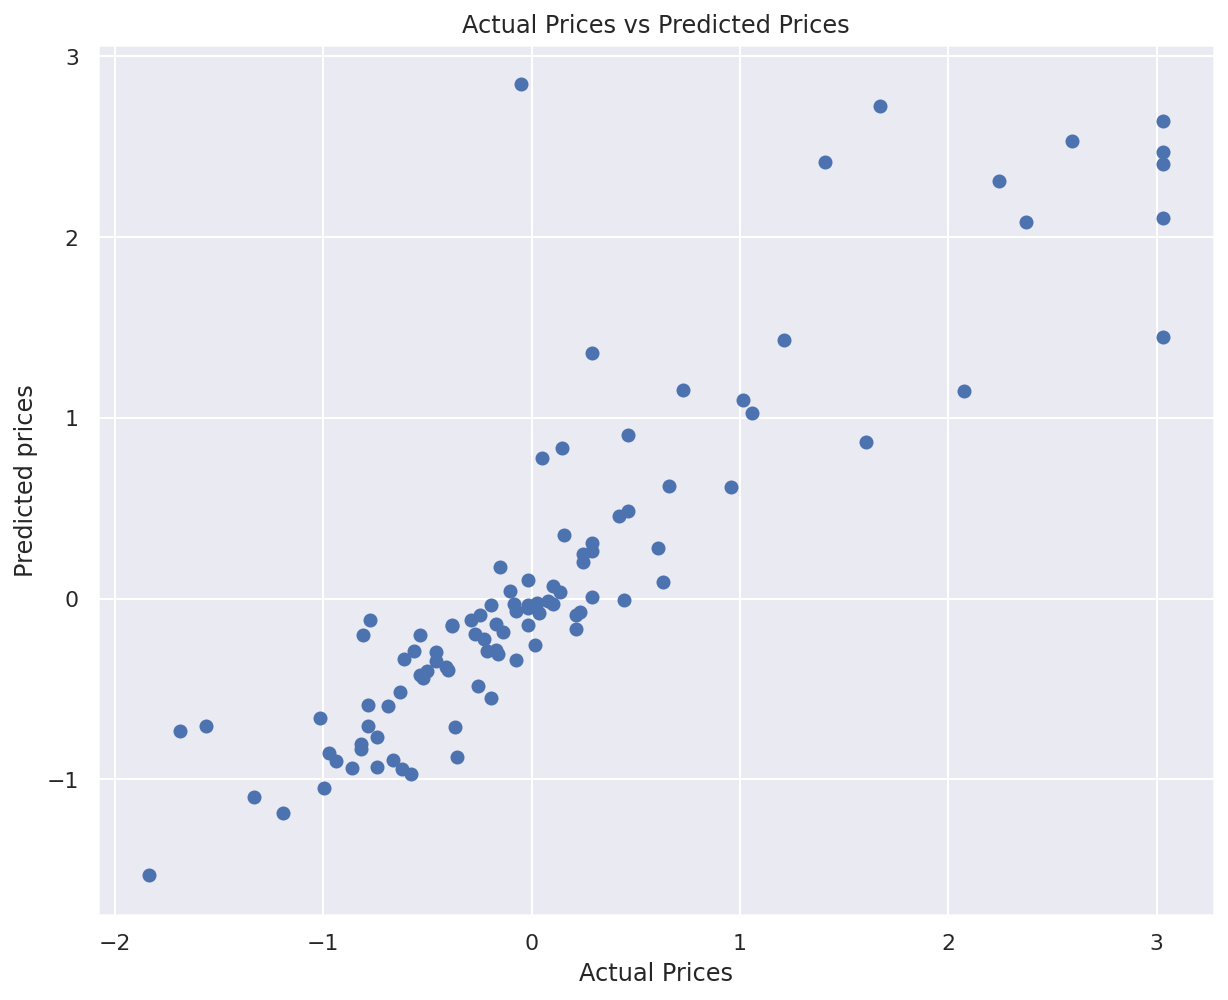

In [58]:
y_train_pred_n = grid_search_cv.best_estimator_.predict(x_train)
y_test_pred_n = grid_search_cv.best_estimator_.predict(x_test)
mse_train_n = mean_squared_error(y_train, y_train_pred_n)
mse_test_n = mean_squared_error(y_test, y_test_pred_n)

print (f'Training MSE: {mse_train_n:.2f}. Test MSE: {mse_test_n:.2f}')

plt.scatter(y_test, y_test_pred_n)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")